# Atelier 2 : Vectorisation

## 1.	Objectif


L’objectif de cet atelier est de decouvrire les techniques courantes de vectorisation de documents text ansi que les differents algorithmes permettant de caculer la similarité ou la distance entre les document texte.


## 2. Méthodes Basiques

Afin de simplifier l’analyse des données texte, il est recommandé d’utiliser des représentations plus consistantes qu’une simple segmentation. Il faut bien évidement réaliser des prétraitements telles que la racinisation, la lemmatisation, supprimer les redondances, supprimer les mots qui représentent le même sens. Mais c’est encore insuffisant pour obtenir un modèle représentatif qui reflète l’importance et le sens exacte de chaque mot dans une expression ou dans un document texte.
Afin de repondre à ce besoin, plusieurs représentations vectorielles des termes contenus dans un texte sont possibles : one-hot-vector, Bag-of-words, TF-IDF, SVD, Word2vec... Nous utilisant scikitlearn pour réaliser ces différentes représentations vectorielles. Ça n’empêche pas que ces représentations vectorielles peuvent être obtenues en faisant du codage from scratch.

## 2.1. One-hot-vector

Le modèle commence par la création d’un vocabulaire à partir du corpus formé par tous les documents ou les expressions texte et determine par la suite pour chaque document/expression la présence de chaque terme du vocabulaire.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import Binarizer

freq   = CountVectorizer()
corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
corpus=[ sent.lower() for sent in corpus]
corpus = freq.fit_transform(corpus)

onehot = Binarizer()
corpus = onehot.fit_transform(corpus.toarray())
print(corpus)

## 2.2.	Beg-of-words

Pour la représentation vectorielle Bag-of-Words, le modèle commence par la création d’un vocabulaire à partir du corpus formé par tous les documents ou les expressions texte et calcul par la suite pour chaque document/expression le nombre d’occurrences de chaque terme du vocabulaire.



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
corpus = ['This is the first document.','This is the second  document.','And the third one.','Is this the first document?']
corpus=[ sent.lower() for sent in corpus]
X = vectorizer.fit_transform(corpus) #sparsy format
print(X.toarray()) # explicit matrix format
print(vectorizer.get_feature_names() ) #vocabulary as list of string
print(vectorizer.vocabulary_.get('document')) #get column index of a specific term in the vocabulary
vectorizer.transform(['Something completely new.']).toarray()#apply the model to a new document

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 1 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
1


array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

## 2.3.	TF-IDF

La représentation vectorielle Bag-of-Words considère la fréquence d’apparition des termes du vocabulaire dans chaque document du corpus séparément des autres. Cette représentation néglige l’importance du terme par rapport au corpus tout en entier.  TF-IDF (term-frequency times inverse document-frequency) est un autre modèle de représentation vectorielle des occurrences des termes d’un document en considérant également leurs occurrences dans tout le corpus. Cette approche va permettre de diminuer l’importance des termes les plus fréquents dans des documents texte tels que les stop words.

tf-idf(t,d)=tf(t,d)×idf(t).

idf(t)=log[(1+n)/(1+df(t))]+1
n: la taille du corpus.
df(t) :  le nombre de documents qui comportent le terme t.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.','this is the second second Document.','And the third one.','Is this the first document?']
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(corpus)
print(X.toarray())
print(vectorizer.get_feature_names() )

#NB: le vecteur tf-idf obtenu sera normalisé pour obtenir des valeurs entre 0 et 1.

[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


## 2.4. Exercice 1: Detection du plagiarisme Approche syntaxique

On va reprendre l'exercie de detection du plagiarisme en se bsant sur une representation vectorielle des document du corpus.

Pour la similarité syntaxique entre des vecteurs, plusieurs distances sont possibles à savoir : distance, euclidienne, Cosine Jaccard, Levenshtein, Hamming…

l'exemple ci-dessous permet de calculer la similarité syntaxique entre les documents en se basant sur une representation vectorielle en TFIDF avec la distance euclidienne et la distance cosine.

In [ ]:
from sklearn.metrics.pairwise import cosine_distances,euclidean_distances
tfidf_vectorizer = TfidfVectorizer()
corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
tfidf_matrix.shape

#compute similarity for first sentence with rest of the sentences
print(euclidean_distances(tfidf_matrix[0:1],tfidf_matrix))
print(cosine_distances(tfidf_matrix[0:1],tfidf_matrix))

[[0.         1.05990529 1.33904078 0.        ]]
[[0.         0.56169962 0.8965151  0.        ]]


* Realiser la même chose en se basant sur les representations OHV et BOW?
* Comparer les performances des trois methodes en terme de temps d'execution et precision?

# 3.	Methodes Avancées


* Installer Gensim: pip install --upgrade gensim
* Recuperer le dataset du plagiarisme?
* Réaliser les différentes tâches de prétraitement?
* Generer le vocabulaire sous forme d'une liste de termes distincts est triés dans l'ordre lexicograpique


## 3.2.	Approche à base des Cooccurrences

* Generer le vocabulaire sous forme d'une liste de termes distincts est triés dans l'ordre lexicograpique

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemmmatizer=WordNetLemmatizer()



corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']
corpus_lemetized=[]

for doc in corpus:
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    corpus_lemetized.append(words)
corpus_lemetized


vocabulary = []
for doc in corpus_lemetized:
    for word in doc:
        if word not in vocabulary:
            vocabulary.append(word)
vocabulary.sort()

vocabulary


['and', 'document', 'first', 'is', 'one', 'second', 'third', 'this']

* Construire une matrice carrée des cooccurrences (Terme à Terme) pour  une fenêtre de taille 𝑛 en considérant les n mots  avant et après le mot  central de la fenêtre.


In [ ]:
V=len(vocabulary)
import numpy as np

corpus = ['This is the first document.','This is the second second document.','And the third one.','Is this the first document?']


M=np.zeros((V,V))
n=4
for doc in corpus_lemetized:
    T=len(doc)-2*n+1 if n<len(doc) else 1
    for t in range(T):
        borne=len(doc) if t+n>len(doc) else t+n
        for w1 in doc[t:borne]:
            for w2 in doc[t:borne]:
                if w1!=w2:
                    M[vocabulary.index(w1)][vocabulary.index(w2)]+=1

* Appliquer La SVD pour obtenir une representation vectorielle des differents mots du vocabulaire dans un espace de dimension 2.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=2)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
vectors = lsa.fit_transform(M)


* En se servant de la bibliotheque matplotlib Tracer les vecteurs obtenus dans un plan 2D

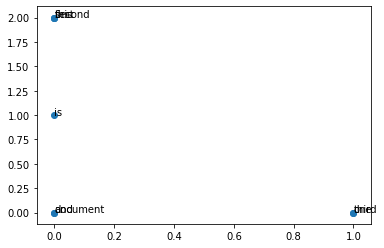

In [ ]:
from matplotlib import pyplot
x=[M[i][0] for i in range(V)]
y=[M[i][1] for i in range(V)]
fig, ax = pyplot.subplots()
ax.scatter(x, y)
for i, txt in enumerate(vocabulary):
    ax.annotate(txt, (x[i], y[i]))

### Exercice


* Récuperer le dataset du plagiarisme?
* Réaliser les différentes tâches de prétraitement?
* Récuperer la représetation vectorielle des differents document du corpus
* Appliquer La SVD pour reduire la dimesion de la representation vectorielle des termes pour les representer dans un espace de dimension 2
* Tracer les vecteurs obtenus en se servant de la bibliotheque matplolib

* En se servant de la représentation vectorielle obtenue, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia. Réaliser une représentation vectorielle des documents en se basant sur les représentations vectorielles de leurs mots (une moyenne par exemple) et utiliser par la suite la distance euclidienne ou la distance corsinus.








## 3.3.	Approchee iteratives

### Word2Vec

Word2Vec est un algorithme à base des réseaux de neurones et qui permet d'avoir une représentation vectorielle des mots contenus dans un corpus très large de documents texte de telle sorte que les mots qui se répètent toujours ensemble dans les mêmes contextes auront des représentations vectorielles similaires.

L'algorithme word2Vect doit tourner sur un corpus très large de documents texte afin d'obtenir un modèle donnant une bonne représentation vectorielle d'un nombre important de mots. Cela nécessitera bien évidement un temps considérable pendant le processus d'apprentissage et nécessitera également des ressources importantes en matière de CPU et de RAM.

La librairie Gensim fourni une implémentation de l'algorithme Word2Vec avec des modèles préétablis qui peuvent être exploités dans la comparaison de documents texte :

    *fasttext-wiki-news-subwords-300
    *conceptnet-numberbatch-17-06-300
    *word2vec-ruscorpora-300
    *word2vec-google-news-300
    *glove-wiki-gigaword-50
    *glove-wiki-gigaword-100
    *glove-wiki-gigaword-200
    *glove-wiki-gigaword-300
    *glove-twitter-25
    *glove-twitter-50
    *glove-twitter-100
    *glove-twitter-200

Ci-dessous un code permettant de récupérer le modèle préétabli contenant 1193514 mots représentés dans un espace vectoriel de dimension 25

In [ ]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-twitter-25')


Le modèle préétablis peut être utilisé pour récupérer les représentations vectorielles des mots comme ci-dessous.

In [ ]:
vec_data = glove_vectors['data']
print(vec_data)

Genism offre plusieurs fonctions permettant de récupérer et d'exploiter les similarités entre les mots en se basant sur leurs représentations vectorielles.

* Le code ci-deesous permet de recuperer les 10 terms les plus similaires à un terme donné.

In [ ]:
glove_vectors.most_similar('data',topn=10)

* Le code ci-dessous permet de récupérer l'ordre de similarité entre deux termes?

In [ ]:
glove_vectors.similarity('data', 'information')

* Le code ci-dessous permet de récupérer le terme le moins convenable dans un ensemble de termes en se basant sur leurs similarités.

In [ ]:
print(glove_vectors.doesnt_match(['data', 'information', 'processing', 'computer', 'car','machine','dashboard']))

Bien évidemment, on peut apprendre notre propre modèle en suivant les étapes ci-dessous

   * Récupérer le corpus (Voir le code dans la section 1)
   * Réaliser les prétraitements nécessaires pour obtenir la liste des documents segmentés: une liste de listes tq chaque sous listes comporte les mots d'un documents du corpus.

In [ ]:
corpus_lemetized=[]
for doc in corpus:
    words = word_tokenize(doc)
    words = [lemmmatizer.lemmatize(word.lower()) for word in words if(not word in set(stopwords.words('english')) and  word.isalpha())]
    corpus_lemetized.append(words)
corpus_lemetized




Pour générer le modèle

In [ ]:
from gensim.models import Word2Vec
from gensim.test.utils import datapath
from gensim.models.word2vec import PathLineSentences
model = Word2Vec(sentences=corpus_lemetized, vector_size=10, window=3, min_count=1, workers=2)


Pour récupérer la representation vectorielle d'un mot:   

In [ ]:
model.wv['data']

Pour récupérer tous les vecteurs

In [ ]:
vectors=model.wv.vectors
vectors

Recuperer tous le smots

In [ ]:
words = model.wv.index_to_key
words

### Doc2Vec

Doc2Vec est une implémentation de l'algorithme Paragraph Vector qui est basé sur Word2Vec et qui est plus adapté à la comparaison de documents texte en se basant sur leur représentations vectorielles.

Cet algorithme dépasse dans sa performance l’utilisation des moyenne des représentations vectorielles des mots présents dans un documents texte.


* Pour génerer le modèle

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus_lemetized)]
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

* Pour récupérer la representation vectorielle de tous les documents   

In [ ]:
vectors=model.dv.vectors
vectors

Pour récupérer la les labels de tous les documents   

In [ ]:
labels=model.dv.index_to_key
labels

Pour récupérer la représentation vectorielle d'un document particulier:

In [ ]:
model.dv[80]

### Exercice


* En se servant de la représentation vectorielle doc2vec, calculer les similarités entre les réponses des étudiants et les définitions trouvées sur Wikipédia.